# Importing Libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Read and Explore Data

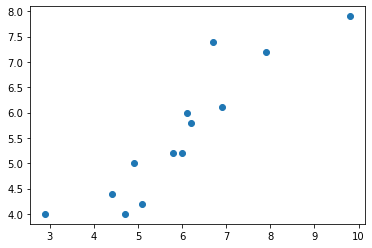

In [2]:
Data_points = np.genfromtxt("RegData.csv" ,  delimiter= ',')
X_Data = Data_points[:,0]
Y_Data = Data_points[:,1]

plt.scatter(X_Data , Y_Data)
plt.show()

# Batch GD
## Hypotysis Function : theta_0 X1 + theta_1 x2

In [3]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)

In [4]:
theta = np.array([0 , 0 ])
alpha = 0.001
Data_length = len(X_Data)
Epoch = 100

Jtheta = []
theta_zero = []
theta_one = []

for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Error = Y -Y_Data
    
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.dot(Error , Error)/Data_length))
    
    Gradt = (np.dot( Error , feture) /Data_length)

    theta = theta - alpha*Gradt
    

print(theta)

[0.14651653 0.87874169]


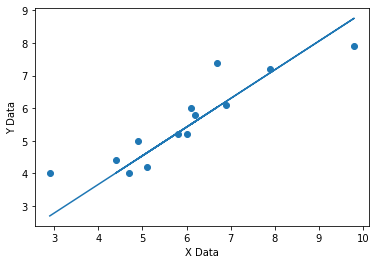

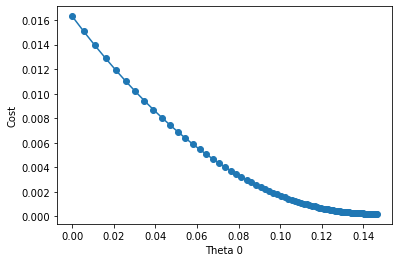

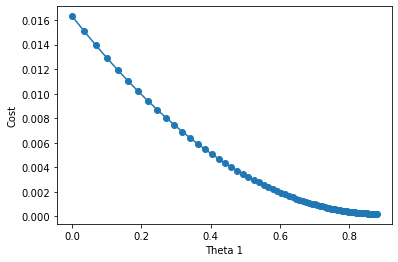

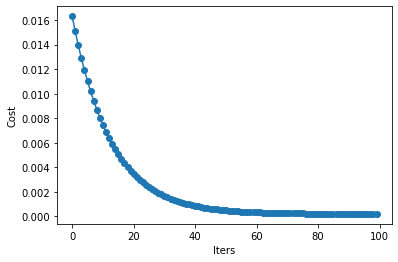

In [5]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot(np.arange(Epoch) , Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Batch GD With Stoping Condition

In [6]:
theta = np.array([0 , 0 ])
alpha = 0.001
Data_length = len(X_Data)
Epoch = 1000

Jtheta = []
theta_zero = []
theta_one = []

Not_first_iter = 0
Max_no_iter = 50

for i in range(Epoch):
    Y= np.dot(theta ,feture.T)
    Error = Y -Y_Data
    
    if Not_first_iter > 1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.000001: 
        break
        
    Not_first_iter+=1
    
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Jtheta.append((alpha/2)*(np.dot( Error , Error)/Data_length))
    
    Gradt = (np.dot( Error , feture) /Data_length)
    theta = theta - alpha*Gradt
    
        
print(theta)        

[0.14482592 0.87260546]


# Show all lines untill we get the rigth fitting line

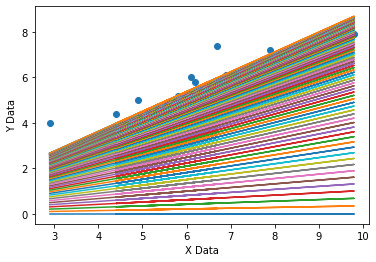

In [7]:
plt.scatter(X_Data , Y_Data)
for i in range(len(theta_zero)):
    plt.plot(X_Data, theta_zero[i]+ X_Data * theta_one[i])
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

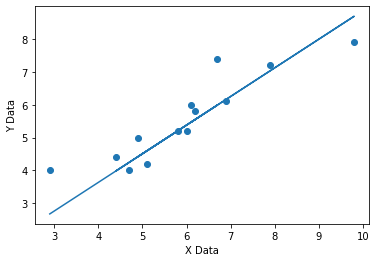

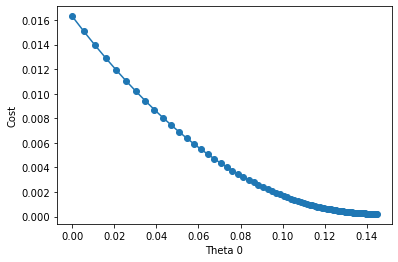

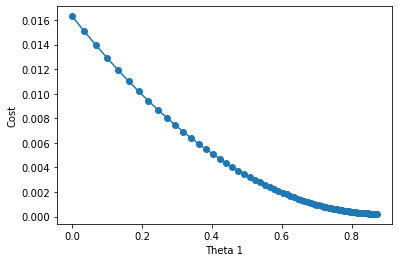

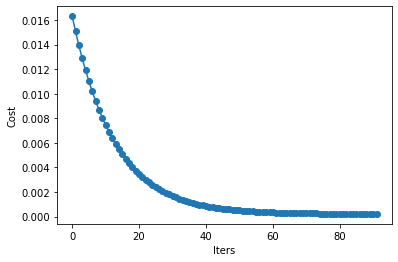

In [8]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

## Just Tring Stochastic GD with real data

In [9]:
theta = np.array([0 , 0 ])
alpha = 0.001
Data_length = len(X_Data)
Epoch = 100

Not_first_iter = 0

Jtheta = []
theta_zero = []
theta_one = []
Max_no_iter = 50

for j in range(Epoch):
   
    if Not_first_iter > 1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.00001:
            break
    Not_first_iter+=1   
    
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    
    for i in range(Data_length):
        Y= np.dot(theta ,feture[i].T)
        Error = Y - Y_Data[i]
        
        if i == Data_length-1:
            Jtheta.append((alpha/2)*(np.dot( Error , Error)))
        Gradt = (np.dot( Error , feture[i]))    
        theta = theta - alpha*Gradt
        
print(theta)  

[0.14237167 0.86589092]


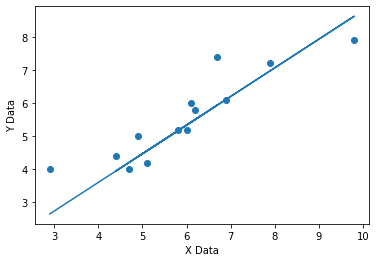

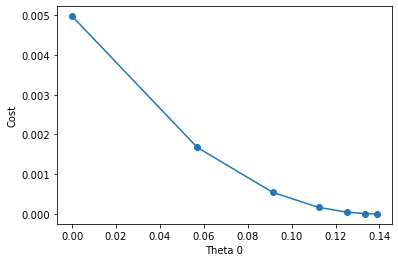

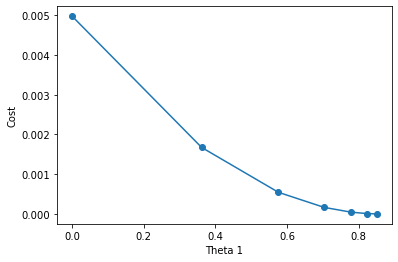

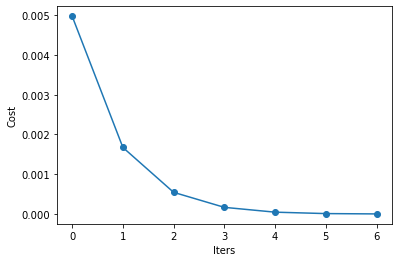

In [10]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()